In [1]:
import numpy as np
import h5py

%matplotlib inline
%run mpl_setup.py
import matplotlib.pyplot as plt

In [2]:
sigf = "C:/Users/chris/Desktop/new-samples/sig1P_track.h5"
bkgf = "C:/Users/chris/Desktop/new-samples/bkg1P_track.h5"

sig = h5py.File(sigf, "r")
bkg = h5py.File(bkgf, "r")

sig_ds = sig["track"]
bkg_ds = bkg["track"]

In [3]:
sig["track"].dtype

dtype([('TauTracks.pt', '<f4'), ('TauTracks.qOverP', '<f4'), ('TauTracks.eta', '<f4'), ('TauTracks.phi', '<f4'), ('TauTracks.eta_at_emcal', '<f4'), ('TauTracks.phi_at_emcal', '<f4'), ('TauTracks.z0sinThetaTJVA', '<f4'), ('TauTracks.d0', '<f4'), ('TauTracks.dRJetSeedAxis', '<f4'), ('TauTracks.rConvII', '<f4'), ('TauTracks.nInnermostPixelHits', '<f4'), ('TauTracks.nPixelSharedHits', '<f4'), ('TauTracks.nSCTSharedHits', '<f4'), ('TauTracks.nPixelHits', '<f4'), ('TauTracks.nSiHits', '<f4'), ('TauTracks.eProbabilityHT', '<f4'), ('TauTracks.trackClassification', '<f4'), ('TauTracks.isCharged', '<f4'), ('TauTracks.isConversion', '<f4'), ('TauTracks.isFakeOrIsolation', '<f4'), ('TauTracks.charge', '<f4')])

In [4]:
def plot(variable, plotrange=None):
    sig = sig_ds[:1000000, :4, "TauTracks.{}".format(variable)]
    bkg = bkg_ds[:1000000, :4, "TauTracks.{}".format(variable)]
    
    if plotrange:
        start, stop = plotrange
        
        if isinstance(start, int) and isinstance(stop, int):
            bins = stop - start
        else:
            bins = 100

    hist_opt = dict(bins=bins, range=plotrange, normed=True, histtype="step")
    text = {0: "First", 1: "Second", 2: "Third", 3: "Fourth"}

    fig, ax = plt.subplots(2, 2, sharex=True, figsize=(12.0, 8.0))
    ax_flat = ax.ravel()
    fig.subplots_adjust(hspace=0.06)

    for i in range(4):    
        s = sig[:, i]
        s = s[~np.isnan(s)]
        b = bkg[:, i]
        b = b[~np.isnan(b)]

        ax_flat[i].hist(s, label="Signal", **hist_opt)
        ax_flat[i].hist(b, label="Background", **hist_opt)
        ax_flat[i].annotate(text[i] + " in $p_\mathrm{T}$", xy=(0.05, 0.9), xycoords="axes fraction")
        
        bottom, top = ax_flat[i].get_ylim()
        ax_flat[i].set_ylim((bottom, 1.05 * top))


    ax[0,1].legend(loc="upper right")
    ax[1,0].set_xlabel(variable)
    ax[1,1].set_xlabel(variable)

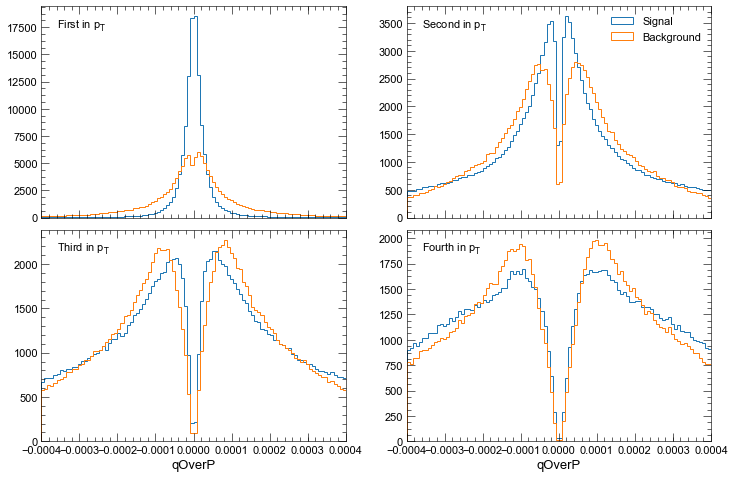

In [5]:
plot("qOverP", (-0.0004, 0.0004))

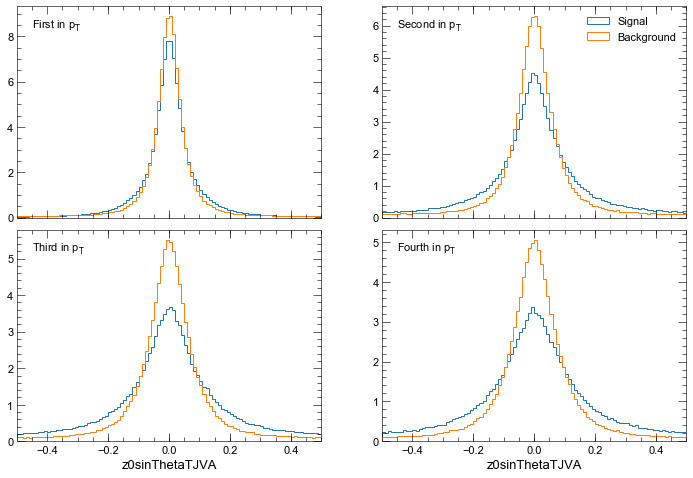

In [6]:
plot("z0sinThetaTJVA", (-0.5, 0.5))

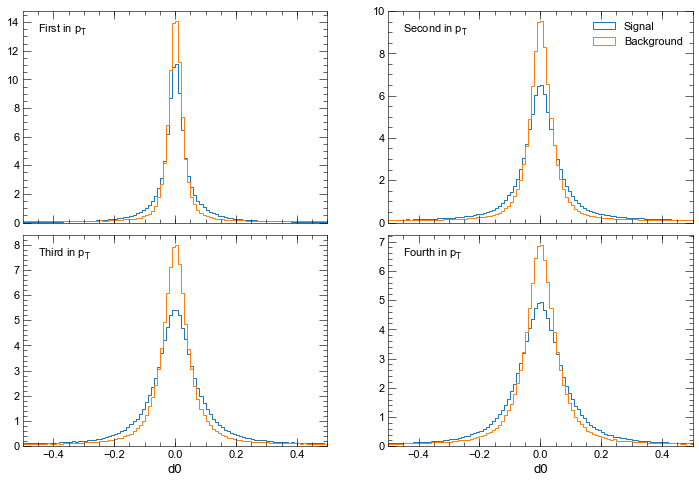

In [7]:
plot("d0", (-0.5, 0.5))

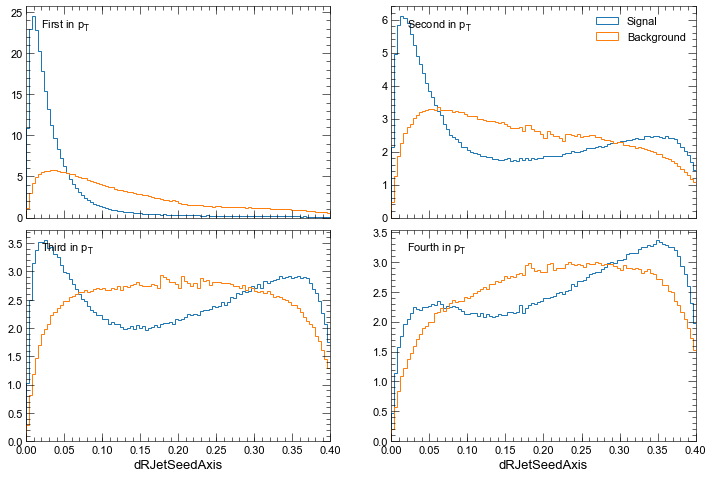

In [8]:
plot("dRJetSeedAxis", (0.0, 0.4))

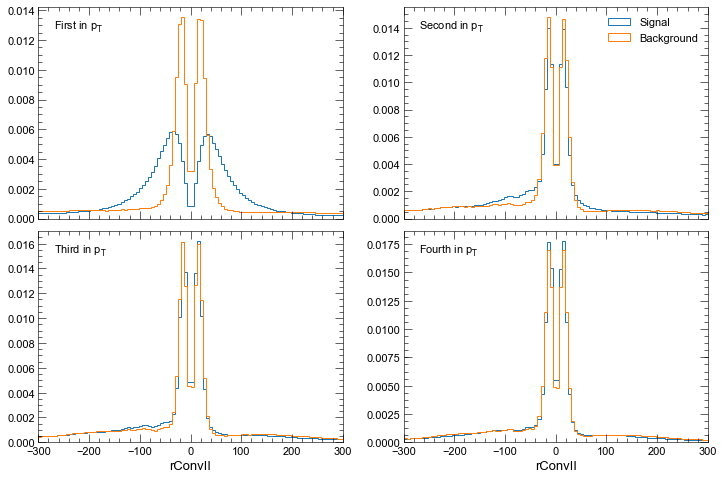

In [9]:
plot("rConvII", (-300.0, 300.0))

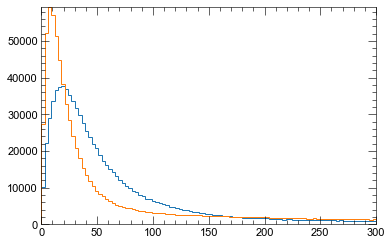

In [46]:
pt_sig = sig_ds[:1000000, 0, "TauTracks.pt"]
pt_bkg = bkg_ds[:1000000, 0, "TauTracks.pt"]

z0_sig = sig_ds[:1000000, 0, "TauTracks.z0sinThetaTJVA"]
z0_bkg = bkg_ds[:1000000, 0, "TauTracks.z0sinThetaTJVA"]

eta_sig = sig_ds[:1000000, 0, "TauTracks.eta"]
eta_bkg = bkg_ds[:1000000, 0, "TauTracks.eta"]


plt.hist(np.sqrt(pt_sig*np.abs(z0_sig)*np.abs(np.sinh(eta_sig))), range=(0, 300), bins=100, histtype="step");
plt.hist(np.sqrt(pt_bkg*np.abs(z0_bkg)*np.abs(np.sinh(eta_sig))), range=(0, 300), bins=100, histtype="step");
plt.xlabel(r"$p_\mathrm{T} \mathrm{sinh}(\eta)$")


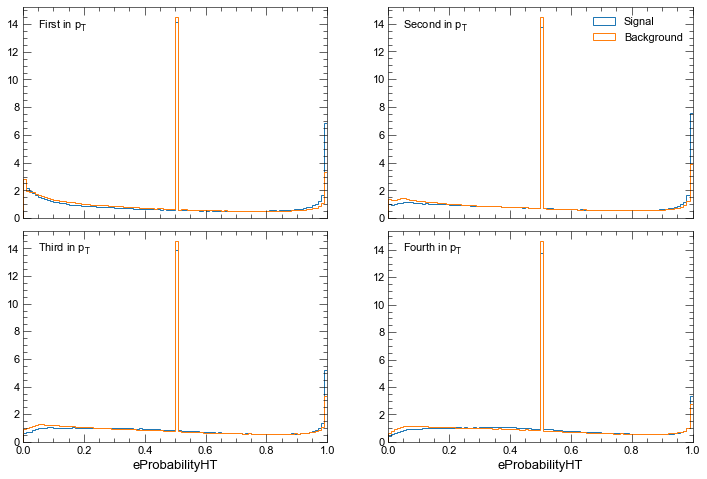

In [10]:
plot("eProbabilityHT", (0.0, 1.0))

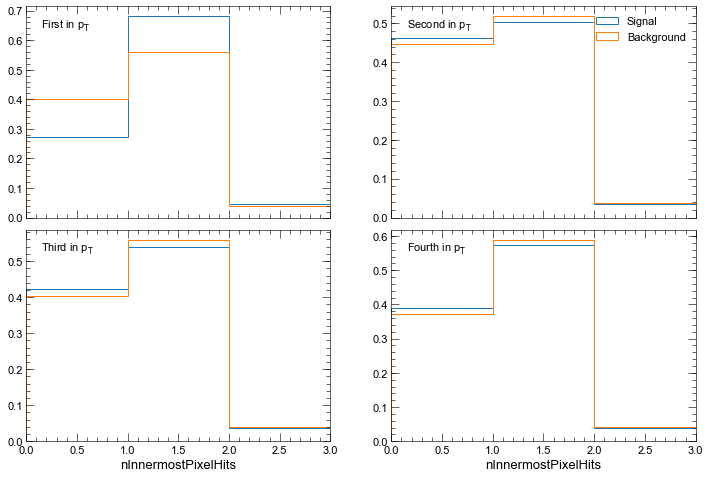

In [11]:
plot("nInnermostPixelHits", (0, 3))

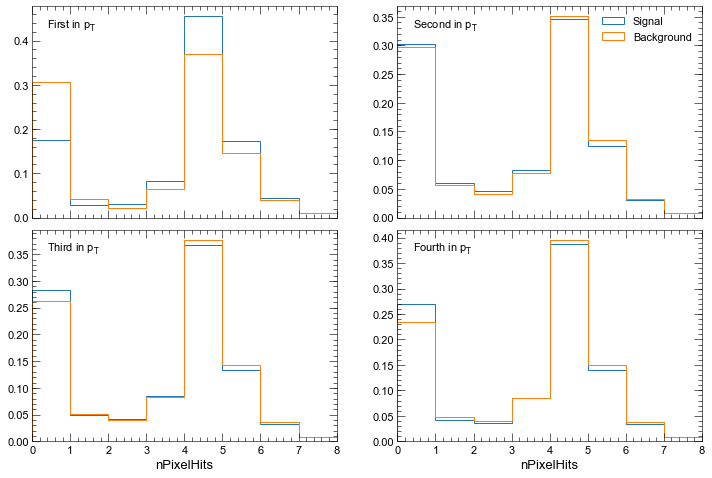

In [12]:
plot("nPixelHits", (0, 8))

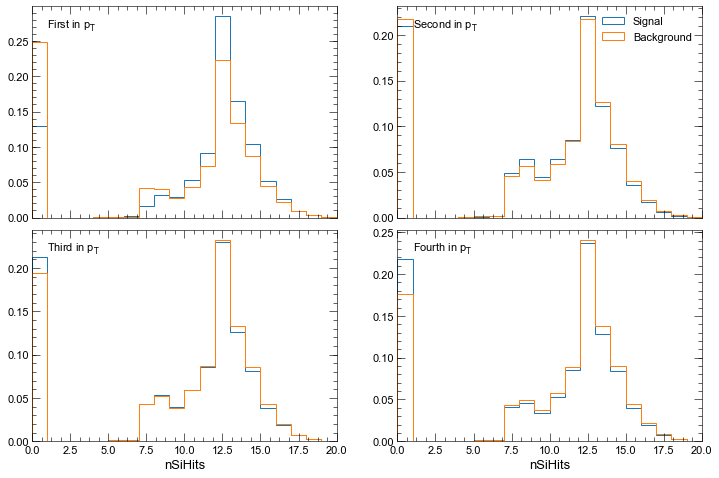

In [13]:
plot("nSiHits", (0, 20))

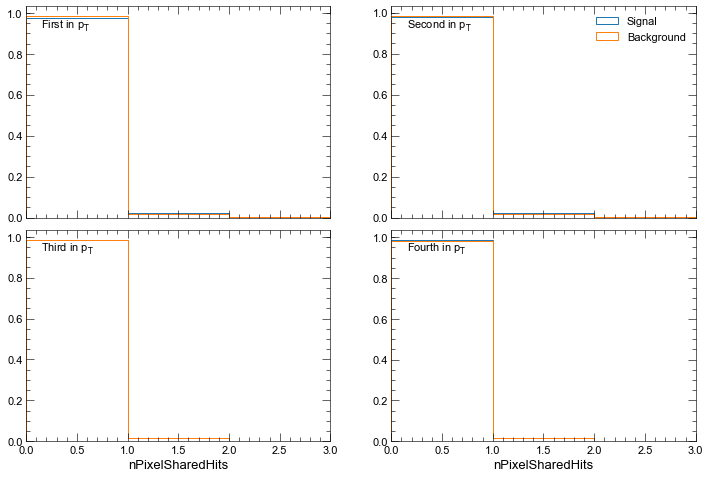

In [14]:
plot("nPixelSharedHits", (0, 3))

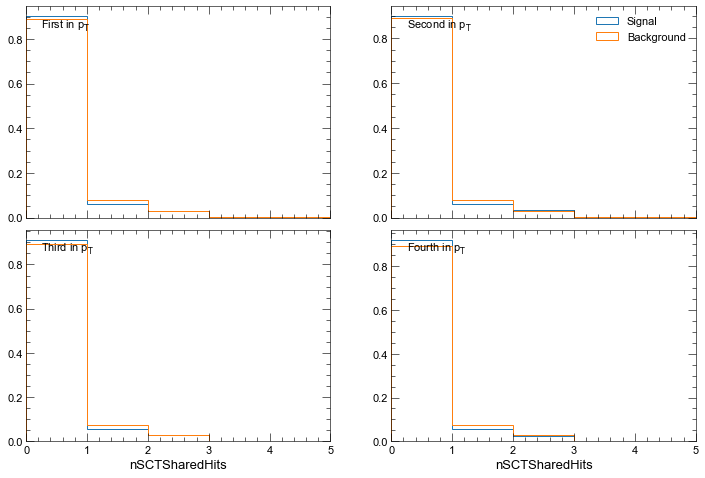

In [15]:
plot("nSCTSharedHits", (0, 5))

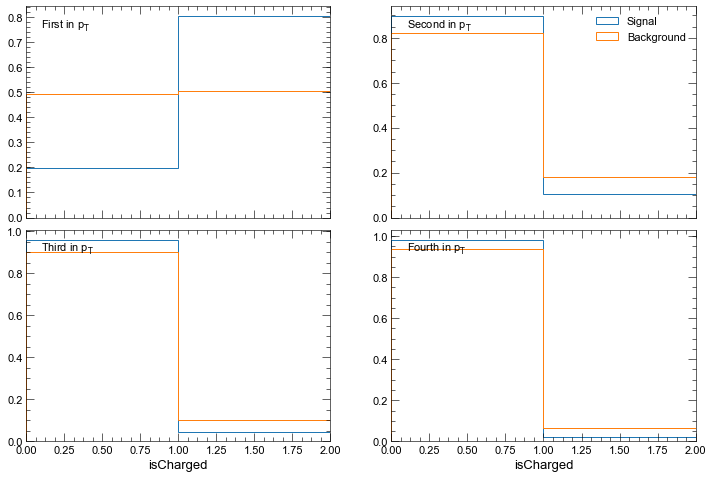

In [16]:
plot("isCharged", (0, 2))

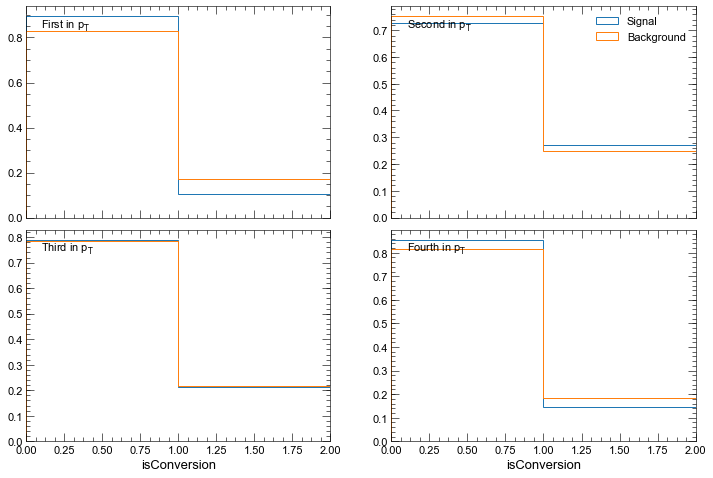

In [17]:
plot("isConversion", (0, 2))

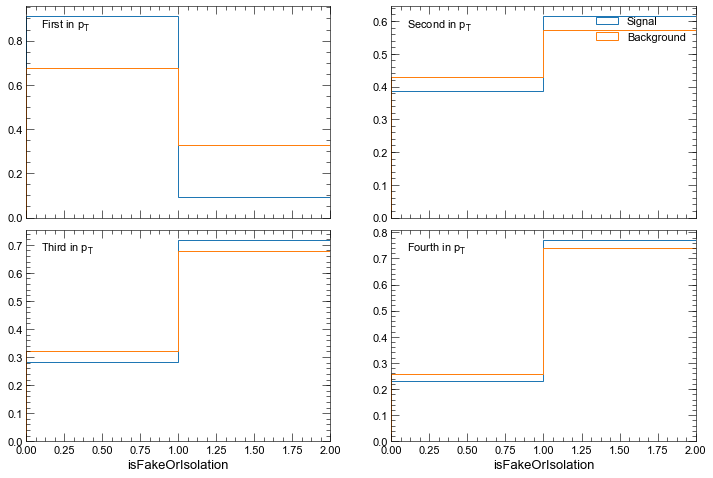

In [18]:
plot("isFakeOrIsolation", (0, 2))

In [19]:
sig.close()
bkg.close()